In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df=pd.read_csv(r"C:\Users\patil\OneDrive\Desktop\New folder\CollegePlacement.csv")
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [82]:
 print("Rows,Cols:",df.shape)
df.info()

Rows,Cols: (10000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  int64  
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  int64  
 10  College_Num             10000 non-null  int32  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 820.4+ KB


In [72]:
df['Placement']=df['Placement'].str.strip().str.lower()
df['Internship_Experience']=df['Internship_Experience'].str.strip().str.lower()

In [73]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [74]:
df['Placement']=df['Placement'].map({'yes':1,'no':0})
df['Internship_Experience']=df['Internship_Experience'].map({'yes':1,'no':0})

In [75]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,0.396400,4.970900,5.561800,2.513400,0.165900
std,15.053101,1.447519,1.470141,2.873477,0.489174,3.160103,2.900866,1.715959,0.372009
min,41.000000,5.000000,4.540000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,0.000000,2.000000,3.000000,1.000000,0.000000
50%,99.000000,7.560000,7.550000,6.000000,0.000000,5.000000,6.000000,3.000000,0.000000
75%,110.000000,8.790000,8.770000,8.000000,1.000000,8.000000,8.000000,4.000000,0.000000
max,158.000000,10.000000,10.460000,10.000000,1.000000,10.000000,10.000000,5.000000,1.000000


In [76]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


In [77]:
# Extract numeric part
df['College_Num'] = df['College_ID'].str.extract('(\d+)').astype(int)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\patil\AppData\Local\Temp\ipykernel_32996\2926700818.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['College_Num'] = df['College_ID'].str.extract('(\d+)').astype(int)


In [78]:
#checkng the how many percent student placed and not placed
df['Placement'].value_counts(normalize=True)*100

Placement
0    83.41
1    16.59
Name: proportion, dtype: float64

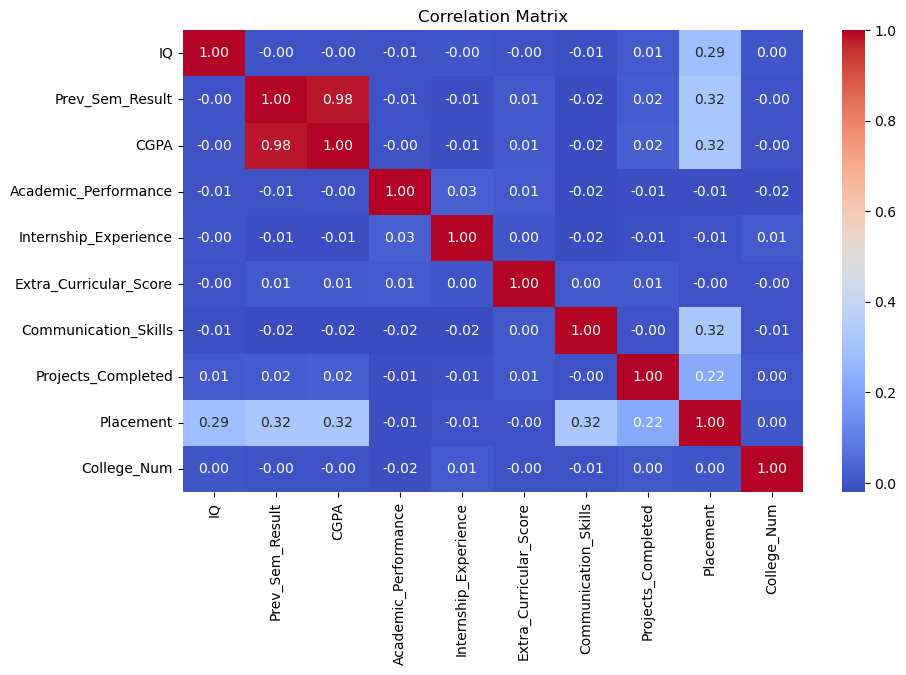

In [79]:
#finding correlation 
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [34]:
df = df.drop(['College_ID'], axis=1)


KeyError: "['College_ID'] not found in axis"

In [31]:
print("Any missing values after preprocessing?\n", df.isnull().sum())

Any missing values after preprocessing?
 IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
College_Num               0
dtype: int64


In [32]:
df.to_csv(r"C:\Users\patil\OneDrive\Desktop\New folder\CollegePlacement_preprocessed.csv", index=False)
print("cleaned Csv data for  Poweerbi")

cleaned Csv data for  Poweerbi


In [35]:
x= df.drop('Placement', axis=1)
y= df['Placement']

In [ ]:
# Splitting the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42, stratify=y
)


In [45]:
#model  Training
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test) # model prediction 
acc = accuracy_score(y_test, y_pred)#compute accuracy
print("Test Accuraacy:",acc)
print("Classification Report:\n", classification_report(y_test, y_pred))#precicsion


Test Accuraacy: 0.9995


In [50]:
#feature Importance
feat_imp = pd.Series(rf.feature_importances_,index=x.columns)
feat_imp = feat_imp.sort_values(ascending=False)
print("Feature Importances:\n", feat_imp)

Feature Importances:
 Communication_Skills      0.286470
IQ                        0.245120
Projects_Completed        0.194866
CGPA                      0.163487
Prev_Sem_Result           0.090089
College_Num               0.008498
Extra_Curricular_Score    0.005589
Academic_Performance      0.004688
Internship_Experience     0.001193
dtype: float64


In [55]:
#savefeature importance to csv
feat_imp.reset_index().rename(columns={'index':'Feature',0:'importance'}).to_csv(r"C:\Users\patil\OneDrive\Desktop\New folder\feature_importance.csv", index=False)
print("Feature importance saved to CSV")

Feature importance saved to CSV


In [56]:
results = X_test.copy()
results['Actual_Placement'] = y_test.values
results['Predicted_Placement'] = y_pred
results.to_csv(r"C:\Users\patil\OneDrive\Desktop\New folder\placement_predictions.csv", index=False)
print("Predictions saved to CSV")

Predictions saved to CSV


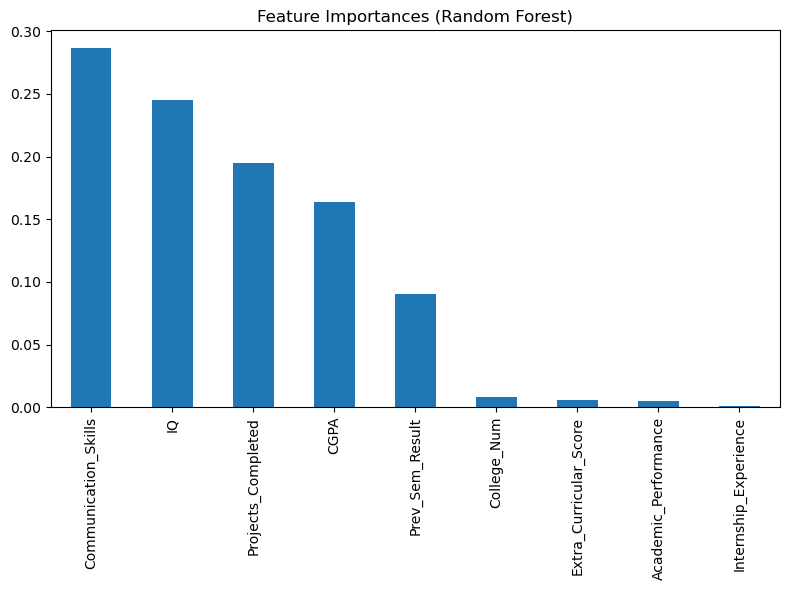

In [57]:
plt.figure(figsize=(8, 6))
feat_imp.plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()